#### Tackling overfitting via regularization

Overfitting is a common problem in machine learning, where a machine performs well on training data but does not generalize well to unseen data(test data). If a model suffers from **overfitting** we can also say the the model has high variance, which can be cause by having too many parameters, leading to a model that is tool complex to the underlying data. Similarly, out model can also suffer from **underfitting**(high bias), which means that our model is not too complex enough to capture the pattern in the training data well and therefore performs poorly on unseen data. 

Often, reserchers use the term "bias" and "variance" or "bias-variance tradeoff" to describe the performance of the model. In the context of machine learning models, **variance** measures the consistency (or variability) of the model prediction for classifying a particular example if we retrain the model multiple times, for example, on differnet subsets of the training dataset. We can say that the model is sensitive to the randomness in the training data. In contrast, **bias** measures how far off the predections are from the correct value.

<p align="center">
  <img src="../markdown-images/overfitting.png" width="700">
</p>

<h5> Addressing overfitting </h5> 

1. Collect more training data.

2. Reduce the number of features
  - Manually select which features to keep

3. Regularization
  - Keep all the features, but reduct magnitude/values of parameters $\theta_j$.
  - Works well when we have a lot of features, each of which contribute a bit to predicting $y$.

One way of finding a good bias-variance tradeoff is to tune the complexity of the model via regularization. 

The concept behind regularization is to introduce additional information (bias) to peanalize extreme parameter (weight) values. The most common form of regularization is **L2 regularization**, which can be written as follows: <br/>

$ \frac{ \lambda }{2}||w||^2 = \frac{1}{2} \sum_{j=1}^{m} w_j^2$  <br/>

Here, $\lambda$ is the so-called **regularization parameter**.

The cost function for logistic regression can be regularized by adding a simple regularization term, which will shrink the weights during the model training: <br/>

$J(w) = \sum_{i=1}^{n} [-y^{(i)}log(\phi(z^{(i)})) - (1-y^{(i)})log(1-\phi(z^{(i)}))] + \frac{\lambda}{2}||w||^2  $
<br/>
Using the regularization parameter, $\lambda$, we can then control how well we fit the training data, while keeping the weights small. By increasing the value of  $\lambda$, we can increase the regularization strength.


The parameter, `C`, that is implemented for the `LogisticRegression` class in scikit-learn comes from a convention in support vector machine. The term `C` is directly related to the regularization parameter $\lambda$, which is its inverse. Consequently, decreasing the value of the inverse regularization parameter, `C`, means that we are increasing the regularization strength, which we can visualize by plotting L2 regularization path for the two weight coefficients:

In [1]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2,3]]
y = iris.target
print('Class labels: ', np.unique(y))

Class labels:  [0 1 2]


In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [3]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

sc.fit(X_train)

X_train_std = sc.transform(X_train)

X_test_std = sc.transform(X_test)

In [4]:
import numpy as np
from sklearn.linear_model import LogisticRegression

weights, params = [], []
for c in np.arange(-5, 5):
    lr = LogisticRegression(C=10.**c, random_state=1, solver='lbfgs', multi_class='ovr')
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10.**c)

weights = np.array(weights)

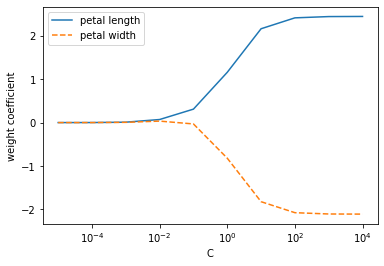

In [8]:
import matplotlib.pyplot as plt

plt.plot(params, weights[:, 0], label='petal length')
plt.plot(params, weights[:, 1], linestyle='--', label='petal width')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
plt.show()